# 6. 결정 트리

In [15]:
import os, numpy as np, matplotlib.pyplot as plt

결정 트리는 분류와 회귀, 다중 출력 작업도 가능한 머신러닝 알고리즘이다.

## 6.1 결정 트리 학습과 시각화

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

`export_graphviz()` 함수를 사용해 결정 트리를 시각화할 수 있다.

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

## 6.2 예측하기
결정 트리 모델이 예측하는 방법은 간단하다. 루트 노드에서 시작해 조건을 확인하고 왼쪽이나 오른쪽 노드로 내려간다.

노드의 `sample` 속성은 얼마나 많은 훈련 샘플이 적용되었는지를 세는 것이다.
노드의 `value` 속성은노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지 알려준다.
노드의 `gini` 속성은 **불순도**를 측정한다. 한 노드의 모든 샘플이 같은 클래스에 속해 있으면 이 노드를 **순수하다**고 한다.

$$ G_1 = 1- \sum_{k=1}^n p_{i, k}^2 $$

## 6.3 클래스 확률 추정
결정 트리는 한 샘플이 특정 클래스 $k$에 속할 확률을 추정할 수 있다.
예를 들어, 길이가 5cm, 너비가 1.5cm인 꽃잎을 발견했다고 하면, 해당하는 노드는 깊이 2의 왼쪽 노드이므로
결정 트리는 그에 맞는 확률을 출력한다. 즉, Iris-Setosa는 0%, Iris-Versicolor는 90.7%, Iris-Verginica는 9.3%일 것이다.

In [5]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[5, 1.5]])

array([1])

## 6.4 CART 훈련 알고리즘

사이킷런은 결정 트리를 훈련시키기 위해 CART(Classification and Regression Tree) 알고리즘을 사용한다.
먼저 훈련 세트를 하나의 특성 $k$의 임계값 $t_k$를 사용해 두 개의 서브셋으로 나눈다.

알고리즘이 훈련 세트를 성공적으로 나누었다면 같은 방식으로 서브셋을 나누고, 그 다음엔 서브셋의 서브셋... 과 같이 반복한다.

## 6.7 규제 매개변수
훈련 데이터에 대해 과대적합을 피하기 위해 결정 트리의 자유도를 제한할 필요가 있다.
상황에 따라 다르지만 보통 결정 트리의 최대 깊이는 제어할 수 있다.

## 6.8 회귀
결정 트리는 회귀 문제에도 사용할 수 있다.

In [10]:
# 2차식 데이터
X = np.random.rand(200, 1)
y = (4 * (X - 0.5) ** 2) + (np.random.randn(200, 1) / 10)

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [14]:
export_graphviz(
    tree_reg,
    out_file="reg_tree.dot",
    rounded=True,
    filled=True
)

CART 알고리즘은 훈련 세트를 평균제곱오차를 최소화하도록 분할하는 것을 제외하고는 이전과 거의 비슷하게 작동한다.

분류에서와 같이 회귀에서도 결정 트리가 과대적합되기 쉽다. 규제가 없다면 아래와 같이 상당히 과대적합된 예측을 하게 된다.

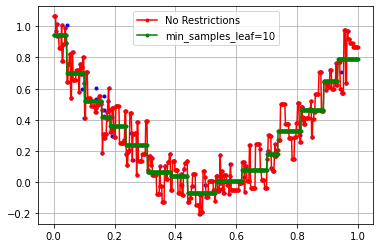

In [16]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)

tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", label="No Restrictions")
plt.plot(x1, y_pred2, "g.-", label="min_samples_leaf=10")

plt.grid(True)
plt.legend(loc="upper center")
plt.show()